# WeatherPy
----
### Analysis:
* Temperature does appear to increase as we approach the equator. However, according Max. Temp vs Latitude scatter plot, temperature does peak at around 20 degrees latitude. This is likely due to Earth's axial tilt, also known as obliquity, which is the angle between an object's rotational axis and its orbital axis, or, equivalently, the angle between its equatorial plane and orbital plane.

* From this randomized data set, we can infer that there is little to no correlation between humidity and the location's latitude. Nor does their appear to be any correlation between cloud coverage and the location's latitude. Additional research and analysis of these two variables for a period of time might provide insights that we're not considered here, due to this data only being for one date in time.

* No significant correlation was found between latitude and cloud cover or wind speed. Frequency of wind speed, however, can be observed. Especially, for wind speeds between 0-10 mph.

#### Additonal Notes:
* This dataset is limited by the sampling time span. Historical data, or a range of dates might provide a better picture of trends in order to explore additional relationships.

* It might also be worth taking both Latitude and Longitude into consideration. Weather, specifically temperature, can vary based on region, and microclimates.

In [ ]:
#!pip install citipy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.


In [5]:
# Create base URL for open weather map API call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

name_city = []
clouds = []
countries = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []

# Create record counter initialized at 1.
record = 1

# Print statement for log.
print("Beginning Data Retrieval")
print('-'*25)

# Loop through all cities in cities list.
for city in cities:
    
    # Try statement to append calls where values are found.
    try:
        response = requests.get(f'{base_url}&q={city}').json()
        name_city.append(response['name'])
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        
        print(f'Processing Record {record} | {city}')
        
        # Increase record counter.
        record += 1
        
        # Do not exceed API call limit.
        time.sleep(1.01)
        
    # If no record found for city, then skip.
    except:
        print('City not found. Skipping...')
    continue

Beginning Data Retrieval
-------------------------
Processing Record 1 | bereda
Processing Record 2 | souillac
Processing Record 3 | harper
Processing Record 4 | bethel
City not found. Skipping...
Processing Record 5 | castro
Processing Record 6 | chuy
Processing Record 7 | upernavik
City not found. Skipping...
Processing Record 8 | ambovombe
Processing Record 9 | cape town
Processing Record 10 | faanui
Processing Record 11 | nanortalik
Processing Record 12 | butaritari
Processing Record 13 | mataura
Processing Record 14 | rikitea
Processing Record 15 | lubliniec
Processing Record 16 | ushuaia
Processing Record 17 | zyryanka
Processing Record 18 | naze
Processing Record 19 | atherton
Processing Record 20 | albany
Processing Record 21 | jalu
Processing Record 22 | puerto ayora
Processing Record 23 | kaitangata
Processing Record 24 | paka
Processing Record 25 | poum
Processing Record 26 | ambon
Processing Record 27 | vaini
Processing Record 28 | carnarvon
Processing Record 29 | san crist

City not found. Skipping...
Processing Record 230 | ust-tsilma
Processing Record 231 | westport
Processing Record 232 | deputatskiy
Processing Record 233 | markova
Processing Record 234 | ihosy
Processing Record 235 | piacabucu
Processing Record 236 | tazovskiy
Processing Record 237 | avarua
Processing Record 238 | aasiaat
Processing Record 239 | foam lake
Processing Record 240 | klaksvik
Processing Record 241 | abu kamal
Processing Record 242 | mayumba
Processing Record 243 | mastic beach
Processing Record 244 | churapcha
Processing Record 245 | kavaratti
Processing Record 246 | muros
City not found. Skipping...
Processing Record 247 | port shepstone
Processing Record 248 | omsukchan
City not found. Skipping...
Processing Record 249 | atbasar
Processing Record 250 | sola
Processing Record 251 | ostrovnoy
Processing Record 252 | camacupa
Processing Record 253 | neiafu
Processing Record 254 | union city
Processing Record 255 | boueni
Processing Record 256 | sao gabriel da cachoeira
Proc

Processing Record 449 | salur
Processing Record 450 | kaabong
Processing Record 451 | ulladulla
Processing Record 452 | griffith
Processing Record 453 | makakilo city
City not found. Skipping...
City not found. Skipping...
Processing Record 454 | katghora
Processing Record 455 | umm kaddadah
City not found. Skipping...
Processing Record 456 | elbistan
Processing Record 457 | forio
Processing Record 458 | labuhan
Processing Record 459 | huarmey
Processing Record 460 | rincon de la victoria
Processing Record 461 | whitehorse
Processing Record 462 | nobres
Processing Record 463 | itarema
Processing Record 464 | kaka
Processing Record 465 | mangit
Processing Record 466 | santa lucia
Processing Record 467 | yarensk
City not found. Skipping...
City not found. Skipping...
Processing Record 468 | halkirk
Processing Record 469 | douentza
Processing Record 470 | george town
Processing Record 471 | codrington
Processing Record 472 | beaufort
Processing Record 473 | takaka
Processing Record 474 | 

### Convert Raw Data to DataFrame

In [11]:
# Create values dictionary from API call lists.
weatherdata = {
    'City': name_city,
    'Cloudiness': clouds,
    'Country': countries,
    'Date': dates,
    'Humidity': humidities,
    'Lat': lats,
    'Lng': lngs,
    'Max Temperature': max_temps,
    'Wind Speed': wind_speeds
}

# Create new DF for values in dictionary.
df_weather = pd.DataFrame(weatherdata)

# Display count of weather values per column.
df_weather.count()

City               549
Cloudiness         549
Country            549
Date               549
Humidity           549
Lat                549
Lng                549
Max Temperature    549
Wind Speed         549
dtype: int64

In [12]:
# Save csv file.
df_weather.to_csv('weather_data.csv')

### Plotting the Data

#### Latitude vs. Temperature Plot

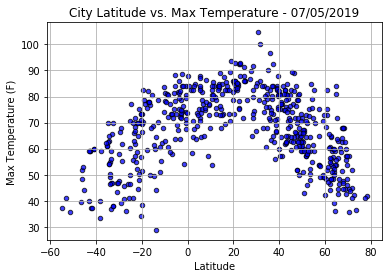

In [43]:
# Create scatter plot for Lat vs Max Temp.
plt.scatter(df_weather['Lat'], df_weather['Max Temperature'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Format axis/labels.
plt.title('City Latitude vs. Max Temperature - 07/05/2019')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Max_Temp_vs_Lat.png')

plt.show()

#### Latitude vs. Humidity Plot

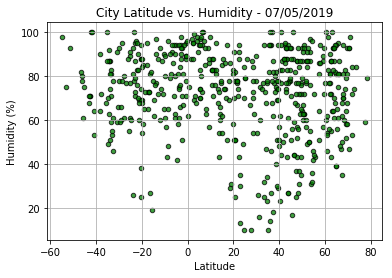

In [44]:
# Create scatter plot for Lat vs Humidity.
plt.scatter(df_weather['Lat'], df_weather['Humidity'], marker='o', s=20, c='g', edgecolors='black', alpha=.75)

# Format axis and labels.
plt.title('City Latitude vs. Humidity - 07/05/2019')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Humidity_vs_Lat.png')

plt.show()

#### Latitude vs. Cloudiness Plot

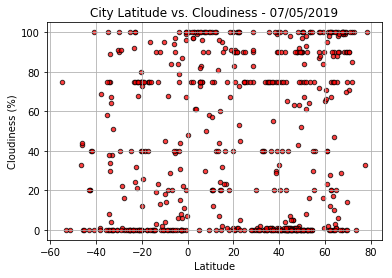

In [48]:
# Create scatter plot for Lat vs Cloudiness.
plt.scatter(df_weather['Lat'], df_weather['Cloudiness'], marker='o', s=20, c='r', edgecolors='black', alpha=.75)

# Format axis and labels.
plt.title('City Latitude vs. Cloudiness - 07/05/2019')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Cloudiness_vs_Lat.png')

plt.show()

#### Latitude vs. Wind Speed Plot

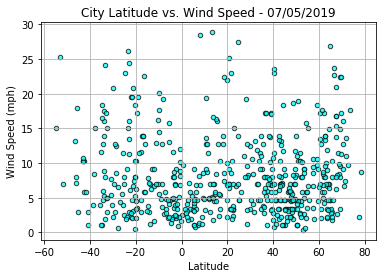

In [52]:
# Create scatter plot for Lat vs Wind Speed.
plt.scatter(df_weather['Lat'], df_weather['Wind Speed'], marker='o', s=20, c='cyan', edgecolors='black', alpha=.75)

# Format axis and labels.
plt.title('City Latitude vs. Wind Speed - 07/05/2019')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('../Images/Windspeed_vs_Lat.png')

plt.show()